In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from collections import Counter
import pandas as pd 
from os import listdir
import numpy as np
import h5py
import cv2
import random

RAW_DATA_FOLDER = 'data/Neighborhood/'   

In [30]:

images = []
labels = []

for f in listdir(RAW_DATA_FOLDER):
    subfolder = RAW_DATA_FOLDER + f + '/'
    tsv_data = pd.read_csv(subfolder + 'airsim_rec.txt', sep='\t')
    steering_col = tsv_data['Steering']
    imgs_subfolder = subfolder + 'images/'
    
    for i, img in enumerate(listdir(imgs_subfolder)):
        if i > len(steering_col) - 1:
            break
        
        img_file = imgs_subfolder + img
        img = cv2.imread(img_file, cv2.IMREAD_COLOR)
        images.append(img)
        labels.append(float(steering_col[i]))

steering = [0.]
steering.extend(labels[1:])
images, steering, labels = shuffle(images, steering, labels)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A005241D0>]],
      dtype=object)

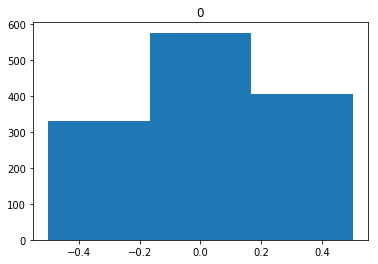

In [31]:
df = pd.DataFrame(labels)
df.hist(bins=3, grid=False)

In [34]:
"""
    Split data into training and testing portions
"""
assert len(images) == len(labels)

training_portion = 0.7

end_index = int(len(images)*training_portion)

labels_training = np.array(labels[:end_index])
steering_training = np.array(steering[:end_index])
images_training = np.array(images[:end_index])

labels_testing = np.array(labels[end_index:])
steering_testing = np.array(steering[end_index:])
images_testing = np.array(images[end_index:])


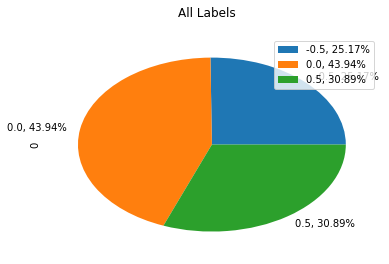

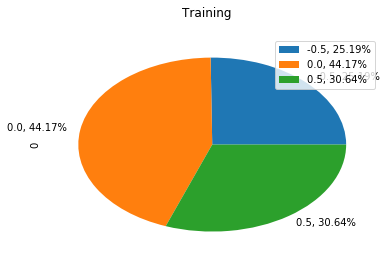

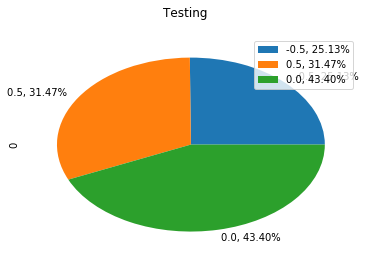

In [35]:
def pie_plot(data, title=None):
    c = Counter(data)
    df = pd.DataFrame(data=list(c.values()), 
        index=["{i}, {j}".format(i=i, 
            j="{0:.2f}%".format(j/sum(c.values())*100.0)) for i, j in c.items()])
    df.plot(kind='pie', subplots=True, title=title)
    
pie_plot(labels, title='All Labels')
pie_plot(labels_training, title='Training')
pie_plot(labels_testing, title='Testing')

In [36]:

with h5py.File('data.h5') as f:
    f.clear()
    
    labels_training_dset = f.create_dataset('label_training', shape=labels_training.shape,
                                           dtype=labels_training.dtype)
    steering_training_dset = f.create_dataset('steering_training', shape=steering_training.shape,
                                             dtype=steering_training.dtype)
    images_training_dset = f.create_dataset('images_training', shape=images_training.shape,
                                           dtype=images_training.dtype)
    
    labels_testing_dset = f.create_dataset('label_testing', shape=labels_testing.shape,
                                          dtype=labels_testing.dtype)
    steering_testing_dset = f.create_dataset('steering_testing', shape=steering_testing.shape,
                                             dtype=steering_testing.dtype)
    images_testing_dset = f.create_dataset('images_testing', shape=images_testing.shape,
                                          dtype=images_testing.dtype)
    
    labels_training_dset[:] = labels_training
    steering_training_dset[:] = steering_training
    images_training_dset[:] = images_training
    
    labels_testing_dset[:] = labels_testing
    steering_testing_dset[:] = steering_testing
    images_testing_dset[:] = images_testing
    
    